In [111]:
import pandas as pd
import country_converter as coco
import numpy as np
import os

import matplotlib.pyplot as plt
import copy
import random

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# pip install country_converter --upgrade
country_numeric  = [4, 8, 10, 12, 16, 20, 24, 28, 31, 32, 36, 40, 44, 48, 50, 51, 52, 56, 60, 64, 68, 70, 72, 74, 76, 84, 86, 90, 92, 96, 100, 104, 108, 112, 116, 120, 124, 132, 136, 140, 144, 148, 152, 156, 158, 162, 166, 170, 174, 175, 178, 180, 184, 188, 191, 192, 196, 203, 204, 208, 212, 214, 218, 222, 226, 231, 232, 233, 234, 238, 239, 242, 246, 248, 250, 254, 258, 260, 262, 266, 268, 270, 275, 276, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 334, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 398, 400, 404, 408, 410, 414, 417, 418, 422, 426, 428, 430, 434, 438, 440, 442, 446, 450, 454, 458, 462, 466, 470, 474, 478, 480, 484, 492, 496, 498, 499, 500, 504, 508, 512, 516, 520, 524, 528, 531, 533, 534, 535, 540, 548, 554, 558, 562, 566, 570, 574, 578, 580, 581, 583, 584, 585, 586, 591, 598, 600, 604, 608, 612, 616, 620, 624, 626, 630, 634, 638, 642, 643, 646, 652, 654, 659, 660, 662, 663, 666, 670, 674, 678, 682, 686, 688, 690, 694, 702, 703, 704, 705, 706, 710, 716, 724, 728, 729, 732, 740, 744, 748, 752, 756, 760, 762, 764, 768, 772, 776, 780, 784, 788, 792, 795, 796, 798, 800, 804, 807, 818, 826, 831, 832, 833, 834, 840, 850, 854, 858, 860, 862, 876, 882, 887, 894]
country_iso3 = ['AFG', 'ALB', 'ATA', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'AZE', 'ARG', 'AUS', 'AUT', 'BHS', 'BHR', 'BGD', 'ARM', 'BRB', 'BEL', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BVT', 'BRA', 'BLZ', 'IOT', 'SLB', 'VGB', 'BRN', 'BGR', 'MMR', 'BDI', 'BLR', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'LKA', 'TCD', 'CHL', 'CHN', 'TWN', 'CXR', 'CCK', 'COL', 'COM', 'MYT', 'COG', 'COD', 'COK', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'BEN', 'DNK', 'DMA', 'DOM', 'ECU', 'SLV', 'GNQ', 'ETH', 'ERI', 'EST', 'FRO', 'FLK', 'SGS', 'FJI', 'FIN', 'ALA', 'FRA', 'GUF', 'PYF', 'ATF', 'DJI', 'GAB', 'GEO', 'GMB', 'PSE', 'DEU', 'GHA', 'GIB', 'KIR', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GIN', 'GUY', 'HTI', 'HMD', 'VAT', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'CIV', 'JAM', 'JPN', 'KAZ', 'JOR', 'KEN', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LBN', 'LSO', 'LVA', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MCO', 'MNG', 'MDA', 'MNE', 'MSR', 'MAR', 'MOZ', 'OMN', 'NAM', 'NRU', 'NPL', 'NLD', 'CUW', 'ABW', 'SXM', 'BES', 'NCL', 'VUT', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NFK', 'NOR', 'MNP', 'UMI', 'FSM', 'MHL', 'PLW', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PCN', 'POL', 'PRT', 'GNB', 'TLS', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA', 'BLM', 'SHN', 'KNA', 'AIA', 'LCA', 'MAF', 'SPM', 'VCT', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'VNM', 'SVN', 'SOM', 'ZAF', 'ZWE', 'ESP', 'SSD', 'SDN', 'ESH', 'SUR', 'SJM', 'SWZ', 'SWE', 'CHE', 'SYR', 'TJK', 'THA', 'TGO', 'TKL', 'TON', 'TTO', 'ARE', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'MKD', 'EGY', 'GBR', 'GGY', 'JEY', 'IMN', 'TZA', 'USA', 'VIR', 'BFA', 'URY', 'UZB', 'VEN', 'WLF', 'WSM', 'YEM', 'ZMB']
country_names_url = "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/CountryNames.csv"


In [112]:
class Country_Regressor():
    def __init__(self):
        # Step 0: Upload your csv to github

        # Step 1: Copy the url from github for the raw file. Make sure it is the raw url, which can be found by clicking the "Raw" button
        urls = ["https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Births_per_woman_2019.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/countries-population-density.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/gdp-per-capita-maddison-project-database.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Beds_Per_1000.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Maternal_Mortality.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/bc737bc557bc8145f7f914974dd6198a778a13a9/Data_Organization/CSV_Uploads/Rockford/Population_2019.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/AdolescentBirthRate_2019.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/GGHD_as_CHE_2019.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Em/statacap.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Me/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_76261.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Me/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_76317.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Me/API_SI.POV.GINI_DS2_en_csv_v2_114293.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Ta/AdolescentBirthRate_2019.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Ta/ShareOfPopulation_ExtremePoverty.csv"
        , "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Ta/ShareOfPopulation_Urban.csv"]

        for ii in range(len(urls)):
            if "github.com" in urls[ii]:
                    urls[ii] = urls[ii].replace("https://github.com", "https://raw.githubusercontent.com")
                    urls[ii] = urls[ii].replace("blob", "refs/heads")

        # This begins the new dataframe that is preloaded with the country names
        country_names_url = "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/CountryNames.csv"
        country_df = pd.read_csv(country_names_url, index_col=0)

        # This reads in the csv for each one listed, and adds their columns and rows to the new dataframe
        for csv in urls:
            df = pd.read_csv(csv, index_col=0)
            #  Rename the current indexes to ISO3
            for ii in range(len(df)):
                    old_name = df.iloc[ii].name
                    new_name = coco.convert(names = df.iloc[ii].name, to = "ISO3")
                    if new_name != "not found":
                            df.rename(index={old_name:new_name},inplace=True)


            # WARNING: If column names are repeated between csv files, then things will be over written
            # Example of a bad case. You have two csv's, "Population.csv" and "GDP.csv", and the columns of both are 1991, 1992, 1993, and 1994
            # Then they will overwrite each other. 
            # Solution: Rename your columns to Population_1991 and GDP_1991

            # Add in data from df for each country that is in the dataframe
            intersection = list(set(df.index) & set(country_df.index)) 
            country_df.loc[intersection, df.columns] = df.loc[intersection]         
            

        country_df.drop("Unnamed: 1", axis=1, inplace=True)
        self.og_df = country_df
    

    def GetDF(self):
        #Added so that it is easier to test new functions out from the class. 
        return self.og_df

    def Clean(self):
        # Clean self.og_df
        df_features = self.og_df[self.features].copy()
        # All NaNs, zeros, and non-numeric are replaced with blank string:
        df_features = df_features.applymap(
            lambda x: x if (pd.api.types.is_number(x) and not pd.isna(x) and x != 0) else ''
        )
        # Drops rows with any blank entries:
        self.df_features_cleaned = df_features[~(df_features == '').any(axis=1)].copy()
        self.df_features_cleaned.head()  
        return self.df_features_cleaned
            
    def PrintHead(self):
        self.og_df.head(20)

    def Print_Features(self):
        print(self.og_df.columns)

    def Feature_Selection(self, features_list):
        self.features = features_list

    def Make_Weights(self):
        o_len = len(self.og_df)
        # Check that features were selected. If not, default to first five features
        # We check if the features are selected here because we're also making Xad, which we don't want to include every feature from the Master csv
        if not hasattr(self, 'features'):
            print("No features selected. Defaulting to using first four features.")
            print("Feature Selection may be done via Feature_Selection()")
            print("To see options for features, use Print_Columns()")
            self.features = self.og_df.columns[0:4]
            print(self.features)
        # Split the dataset into two, one which will have the weight Alive, and one that will have the weight for Dead
        # Xad = X, the input, split into Alive (a) and Dead(d) parts
        # Really it should be called df_ad since it has X, Y, and Weights
        self.Xad = pd.concat([self.og_df[self.features],self.og_df[self.features]])
        self.Xad.index.values[range(o_len)] = self.Xad.index.values[range(o_len)] + "_Dead"
        self.Xad.index.values[range(o_len,2*o_len)] = self.Xad.index.values[range(o_len,2*o_len)] + "_Alive"
        self.Xad["Alive"] = 1
        self.Xad.iloc[0:o_len, -1] = 0
        self.Xad["Weight"] = 0.0
        self.Xad.iloc[:o_len, -1] = self.og_df["Population_2019"] * self.og_df["Maternal_mortality_ratio _2019"] / 100000
        self.Xad["Weight"] = pd.to_numeric(self.Xad["Weight"], errors = "coerce").round().astype('Int64')
        self.Xad.iloc[o_len:2*o_len, -1] = pd.to_numeric(self.og_df["Population_2019"] * (1 - self.og_df["Maternal_mortality_ratio _2019"] / 100000), errors = "coerce").round().astype('Int64')

    def Train_Test_Split(self, speedup):
        # Example usage: Train_Test_Split("Infinite Speed Up gotta go fast") 
        # Example usage: Train_Test_Split(10) 
        # Does a 80 20 split
        # This is hard coded because sampling with removal on the 8 billion people on earth takes eight hours to run if you go by individuals
        # I have a way of speeding this up by a factor of N if you go by batches of people of size N, although that only approximiates the distirbution 
        # I also two theoretical ways of speeding it up so it runs in a few minutes or less (one good version and one bad version)... but I need to finish working out the math
        countries_names_all = ['CHN','IND','USA','IDN','PAK','NGA','BRA','BGD','RUS','JPN','MEX','ETH','PHL','EGY','VNM','COD','IRN','DEU','TUR','THA','FRA','GBR','ITA','ZAF','TZA','MMR','KOR','KEN','COL','ESP','SDN','ARG','UKR','DZA','UGA','IRQ','POL','AFG','CAN','MAR','YEM','MYS','UZB','PER','AGO','GHA','SAU','MOZ','VEN','NPL','MDG','CIV','PRK','CMR','AUS','NER','LKA','MLI','BFA','SYR','ROU','KAZ','CHL','MWI','ZMB','NLD','ECU','GTM','TCD','KHM','SEN','SOM','ZWE','GIN','RWA','BEN','BDI','TUN','BOL','BEL','CUB','HTI','DOM','GRC','JOR','CZE','SSD','PRT','SWE','AZE','HND','HUN','PNG','TJK','ARE','BLR','ISR','AUT','CHE','TGO','SLE','HKG','LAO','BGR','LBY','SRB','TKM','KGZ','PRY','NIC','SLV','DNK','LBN','SGP','COG','FIN','SVK','NOR','LBR','CRI','NZL','CAF','IRL','PSE','OMN','MRT','KWT','PAN','HRV','GEO','URY','BIH','MNG','ERI','PRI','ARM','ALB','JAM','LTU','MDA','NAM','QAT','GMB','BWA','GAB','LSO','SVN','GNB','LVA','MKD','XKX','GNQ','BHR','TTO','EST','TLS','CYP','MUS','SWZ','DJI','FJI','GUY','COM','BTN','SLB','MAC','MNE','LUX','SUR','CPV','MLT','MDV','BRN','BHS','BLZ','ISL','VUT','NCL','BRB','PYF','STP','WSM','LCA','GUM','CUW','KIR','GRD','FSM','ABW','VIR','TON','VCT','SYC','ATG','IMN','AND','DMA','CYM','BMU','GRL','FRO','ASM','MNP','KNA','MHL','TCA','SXM','LIE','MCO','VGB','GIB','SMR','MAF','PLW','NRU','TUV']
        self.countries_names = self.og_df.index.to_list()

        if type(speedup) == str:
            # ... why did I sort the countries by population size?
            train_all = [1126175209, 1111220306, 262664668, 217983849, 184645202, 167595128, 165963271, 131928636, 116360318, 101308127, 100609844, 92598153, 88643563, 86046476, 77736146, 74357828, 69642781, 66476519, 66061000, 57215605, 53907422, 53466615, 47779749, 47670734, 47339015, 42115302, 41412885, 40961632, 39930976, 37707802, 36435928, 35977827, 35965264, 34631557, 34402935, 32951354, 30370489, 30285945, 30096730, 28971816, 28092689, 26754282, 26369874, 25959039, 25898598, 25007025, 24051523, 23909289, 23151166, 22733268, 22574867, 22555063, 20832014, 20404010, 20268173, 18355908, 17442116, 16857171, 16770964, 16279138, 15495346, 15366372, 15358309, 15221141, 14811981, 13875776, 13874927, 13683230, 13346400, 13184808, 13082845, 12823443, 12214042, 10427854, 10219953, 10182773, 9805017, 9498049, 9336818, 9191406, 8962883, 8882960, 8716377, 8575384, 8538121, 8538740, 8339303, 8228745, 8222291, 8020427, 7953683, 7816224, 7688059, 7623817, 7558905, 7538649, 7242939, 7105899, 6861010, 6768323, 6185228, 6005581, 5790371, 5582907, 5562354, 5556074, 5443176, 5274514, 5212205, 5189136, 4976773, 4650748, 4635792, 4562735, 4493904, 4417008, 4363329, 4277500, 4034791, 3999877, 3985034, 3956010, 3948634, 3747828, 3673944, 3573078, 3553009, 3388954, 3158684, 2976328, 2718758, 2675588, 2613195, 2592506, 2556595, 2368377, 2284398, 2258139, 2235618, 2130784, 2120190, 2111543, 1965421, 1865522, 1814695, 1768230, 1671785, 1574101, 1530675, 1500961, 1431718, 1336025, 1187287, 1090200, 1061737, 1040469, 1029003, 1012748, 944990, 870462, 731604, 646171, 629147, 611959, 582195, 537798, 497704, 496393, 485125, 411628, 403345, 389853, 354786, 315550, 308420, 288624, 233829, 227037, 225286, 223302, 170772, 168134, 142044, 129521, 126280, 98866, 92673, 88193, 87444, 85472, 84707, 83284, 78225, 72925, 67360, 61107, 54333, 53919, 51116, 45028, 41447, 40075, 38578, 37607, 35304, 34602, 32392, 30929, 30428, 29179, 28448, 27567, 27313, 14261, 9262, 8487]
            # test_all = [self.og_df["Population_2019"].loc[countries_names_all[ii]] - train_all[ii] for ii in range(len(train_all))]
            self.train = []
            self.test = []
            for name in self.countries_names:
                if name in countries_names_all:
                    self.train.append(train_all[countries_names_all.index(name)])
                    self.test.append(self.og_df["Population_2019"].loc[name] - self.train[-1])
                else:
                    print("Warning. Someone messed with the master csv and now there's a country that doesn't have a numerical entry in Population_2019")
                    print("This process has failed because of that")
        elif type(speedup) == int and speedup >= 1:
            # This needs to be fixed in a couple of ways
            # 1. Don't use all countries. Only use countries in the og_df
            # 2. It's currently out of order and needs to be sorted in the same way type(speedup) == int needed to be fixed.
            self.test = [1407745000	,1389030312	,328329953	,272489381	,230800899	,209485641	,207455459	,164913055	,145453291	,126633000	,125762982	,115737383	,110804683	,107553158	,97173776	,92947442	,87051648	,83092962	,82579440	,71522271	,67382061	,66836327	,59729081	,59587885	,59174891	,52640713	,51764822	,51202827	,49907985	,47134837	,45548175	,44973465	,44957458	,43294546	,42999637	,41192171	,37965475	,37856121	,37618495	,36210898	,35111408	,33440596	,32964701	,32449303	,32375632	,31258945	,30063799	,29884380	,28938098	,28414064	,28219554	,28193009	,26037632	,25506095	,25334826	,22947757	,21803000	,21068405	,20961952	,20353534	,19371648	,19209555	,19197744	,19025752	,18513839	,17344874	,17340021	,17103803	,16685223	,16481304	,16352922	,16030971	,15271368	,13034346	,12776103	,12726755	,12255336	,11875081	,11671386	,11488980	,11202846	,11105163	,10894043	,10721582	,10671891	,10671870	,10423384	,10286263	,10278887	,10024283	,9943633	,9771141	,9609010	,9529966	,9445785	,9419758	,9054000	,8879920	,8575280	,8463068	,7731991	,7507900	,7237636	,6975761	,6951033	,6945235	,6803944	,6590211	,6515058	,6483657	,6222318	,5814422	,5794594	,5703569	,5616661	,5521606	,5454147	,5347896	,5043721	,4999553	,4979200	,4944703	,4934340	,4685306	,4591241	,4467708	,4442316	,4234700	,3949390	,3720161	,3397206	,3345533	,3267673	,3240194	,3193694	,2962500	,2854191	,2823271	,2794137	,2664224	,2650494	,2638657	,2456844	,2332083	,2267706	,2209405	,2088385	,1967696	,1913822	,1876262	,1788891	,1670177	,1483756	,1363985	,1326898	,1300945	,1286671	,1265985	,1179874	,1088709	,914899	,807665	,786578	,764824	,728147	,672000	,622028	,620001	,605768	,514104	,504062	,487731	,442680	,394675	,385829	,360563	,291985	,283606	,281207	,279034	,213392	,209780	,177661	,161808	,157441	,123921	,115981	,110282	,109203	,106669	,105669	,104167	,97625	,91364	,83957	,76474	,67880	,67327	,64107	,56225	,51795	,50209	,48129	,46952	,44007	,43166	,40385	,38563	,38109	,36395	,35494	,34663	,34267	,17798	,11587	,10581	]
            self.countries = [ii for ii in range(len(self.countries_names))]
            run_length = int(sum(self.test)* .2 / speedup)
            for ii in range(run_length):
                self.test[random.sample(self.countries, counts = self.test,k=1)[0]] -= speedup
            self.test = [self.og_df["Population_2019"].loc[self.countries_names[ii]] - self.test[ii] for ii in range(len(self.test))]
            print("Warning: Weights are currently out of order and need to be sorted like they were in the first if statement")
        else:
            print("This isn't very good code. Sorry -Rocky")

    def KFold(self, number_of_folds, speedup):
        # Legit, KFold seems unnecessary given what our data looks like, lots of balls in not a lot of bins. 
        # Each fold is going to look like every other fold plus .01% of noise

        # This isnt really a KFold I think? This is just resampling. Crap
        # For this to be KFold, I'd need to remove 1/k of the original and run it multiple times keeping track of what's removed
        # This creates the weights for the logistic regression for each train and test set. 
        # Train weights are used for logistic regression fitting
        # Test weights are used for 
        # weights for nth train kfold is weights_df.columns[2n]
        # weights for nth test kfold is weight_df.columns[2n+1]
        self.weights_df = pd.DataFrame(index = self.og_df.index)
        for ii in range(number_of_folds):
            self.Train_Test_Split(speedup)
            self.weights_df[str(2*ii)] = self.train
            self.weights_df[str(2*ii + 1)] = self.test


    def Fit(self, X, Y, W):
        # An example would be
        # X = self.Xad[self.features]
        # Y = self.Xad["Alive"]
        # self.W = self.Xad["Weight"]
        self.log_reg = Pipeline([('scale', StandardScaler()), ('log', LogisticRegression(penalty=None))])
        self.log_reg.fit(X, Y, log__sample_weight=W)



    def Predict(self, X):
        return self.log_reg.predict_proba(X)

    def Cross_Validate(self, y_hh_true, y_hh_predict):
        # I think what we're trying to predict is the mortality ratio as a percent
        accuracy_score(y_hh_true, y_hh_predict)
        print("Not working yet and I'm not sure how to measure it just yet. It's definitely not supposed to be accuracy score since we're not classifying.")
             
    def Cluster_Numer_Estimation(self, _features_for_clustering, seed = 3425):
        #copy of the df which will have only features we need for clustering:
        df_temp = self.df_features_cleaned[_features_for_clustering].copy()
        # Normalize the data, i.e. mean zero and std = 1 by column
        df_temp = df_temp.apply(lambda x: (x-x.mean())/ x.std(), axis = 0)

        # Do KMeans clustering for range of clusters, and then plot the mean square error

        cluster_range = 10
        loss = [0] * cluster_range
        for ii in range(cluster_range):
            kmeans = KMeans(n_clusters = ii + 1, random_state = seed, n_init=10)
            kmeans.fit_predict(df_temp.values)
            loss[ii] = kmeans.inertia_
            
        plt.figure()
        plt.plot(range(1, cluster_range + 1), loss)
        plt.xlabel("Number of cluster")
        plt.ylabel("Sum of Square Errors")
        plt.show()

        print('Choose cluster number. Typically chosen by grabbing the "elbow" from the above plot')

    def Cluster_With_kMeans(self, _features_for_clustering, nrclusters=4, seed = 3425):
        ## starting same as in Cluster_Numer_Estimation as maybe you will skip that step if you know how many clusters you want
        self.features_for_clustering = _features_for_clustering
        #copy of the df which will have only features we need for clustering:
        self.df_clusterskMeans = self.df_features_cleaned[self.features_for_clustering].copy()
        # Normalize the data, i.e. mean zero and std = 1 by column
        self.df_clusterskMeans = self.df_clusterskMeans.apply(lambda x: (x-x.mean())/ x.std(), axis = 0)
         #the number of cluster is chosen here to be 4 defautly,, you can change it, the seed as well. 
        self.cluster_choice = nrclusters
        #clustering procedure:
        kmeans = KMeans(n_clusters = self.cluster_choice, random_state = seed, n_init=10).fit_predict(self.df_clusterskMeans.values)
        country_list = [[self.df_clusterskMeans.iloc[ii].name for ii in range(len(kmeans)) if kmeans[ii] == jj] for jj in range(cluster_choice)]
        #adding the column with cluster id to the cleaned table (0,1,2... nrclusters)
        self.df_features_cleaned['cluster_id'] = kmeans

    
    def DrawClusters(self):
        # If exactly two columns were chosen, then we can plot the data in a pretty way
        # If exactly three columns were chosen, then we can plot the data in a less pretty way, but I haven't written this yet
        if len(self.features_for_clustering) == 2:
            kmeans = KMeans(n_clusters= self.cluster_choice, random_state=seed, n_init=10)
            y_kmeans = kmeans.fit_predict(df)
            # Plot the clusters
            plt.scatter(self.df_clusterskMeans.iloc[:, 0], self.df_clusterskMeans.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

            # Plot the centroids
            centers = kmeans.cluster_centers_
            plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

            plt.title('K-means Clustering')
            plt.xlabel(self.features_for_clustering[0])
            plt.ylabel(self.features_for_clustering[1])
            plt.show()
            
        elif len(self.features_for_clustering) == 3:
            kmeans = KMeans(n_clusters=self.cluster_choice, random_state=seed, n_init=10)
            self.df_clusterskMeans['cluster'] = kmeans.fit_predict(self.df_clusterskMeans)

            # 3D scatter plot
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')

            # Scatter plot with different colors for each cluster
            scatter = ax.scatter(dself.df_clusterskMeansf.iloc[:,0], self.df_clusterskMeans.iloc[:,1], self.df_clusterskMeans.iloc[:,2], c=self.df_clusterskMeans['cluster'], cmap='viridis', s=50)

            # Still want to add in option to plot centroids

            # Add labels and title
            ax.set_xlabel(self.features_for_clustering[0])
            ax.set_ylabel(self.features_for_clustering[1])
            ax.set_zlabel(self.features_for_clustering[2])
            ax.set_title('3D Scatter Plot of K-means Clusters')

            # Add a legend
            legend = ax.legend(*scatter.legend_elements(), title='Clusters')
            ax.add_artist(legend)

            plt.show()

    def Quantile_Division_Into_Groups(self, feature, nrclusters=4):
        #based on one feature divides the data set into nrclusers groups with same number of countries in each:
        self.df_clusterQuantile = self.df_features_cleaned.copy()
        self.df_clusterQuantile['cluster_nr_quantile'] = pd.qcut(self.df_clusterQuantile[feature], q=nrclusters, labels=range(nrclusters))



In [113]:
#initialize the object of the class Country_Regressor
test = Country_Regressor()
test.Print_Features()

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

Index(['Births_per_woman_2019', 'Population_Density_2010',
       'GDP_per_capita_2022', 'beds_per_1000',
       'Maternal_mortality_ratio _2019', 'Population_2019',
       'Adolescent_Birth_Rate_2019', 'GGHD_as_CHE_2019', 'VDem_2015',
       'WBregion_2015', 'sample_polity_2015', 'Capacity_2015',
       'Capacity_sd_2015', 'censusfreq_2015', 'v2clrspct_2015',
       'v2stfisccap_2015', 'v2terr_2015', 'infcap_2015', 'irai_qbfm_2015',
       'irai_qpa_2015', 'irai_erm_2015', 'milexpercap_2015', 'milpercap_2015',
       'policecap_2015', 'StateHist50s_2015', 'bti_mo_2015', 'wbstat_2015',
       'tax_inc_tax_2015', 'tax_trade_tax_2015', 'taxrev_gdp_2015', 'GDP_2019',
       'GDP_per_Capita_2019', 'Gini_2019',
       'Share_of_Pop_in_Extreme Poverty_2019',
       'Urban_population_percent_2019'],
      dtype='object')


In [114]:
# for testing purpose just choose some features, clean the df with them, it is ready for any usage!
featuresToClean = ['Adolescent_Birth_Rate_2019', 'GDP_per_capita_2022', 'WBregion_2015', 'Capacity_2015', 'GGHD_as_CHE_2019']
test.Feature_Selection(featuresToClean)
newFrame = test.Clean()

/var/folders/n_/wmbdlzd17s7gcyvkql_0tn3c0000gq/T/ipykernel_43429/4125845647.py:64: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_features = df_features.applymap(


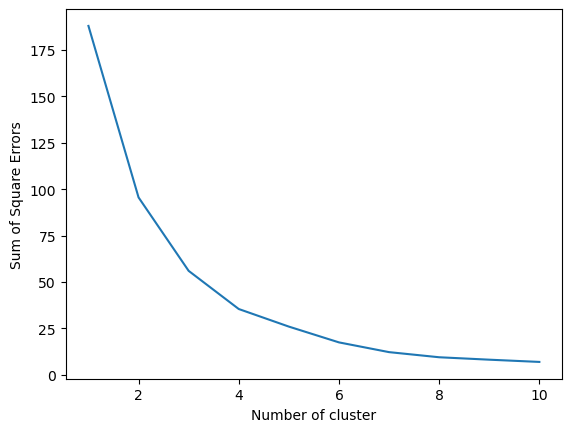

Choose cluster number. Typically chosen by grabbing the "elbow" from the above plot


In [119]:
test.Cluster_Numer_Estimation(['Adolescent_Birth_Rate_2019', 'GDP_per_capita_2022'])

In [115]:
# test the Clusering with kMeans using 2 features
test.Cluster_With_kMeans(['Adolescent_Birth_Rate_2019', 'GDP_per_capita_2022'])
test.df_features_cleaned.head()

,Adolescent_Birth_Rate_2019,GDP_per_capita_2022,WBregion_2015,Capacity_2015,GGHD_as_CHE_2019,cluster_id
ARE,3.57,77203.67,5.0,0.7112,51.0,2
ARG,41.84,18292.318,4.0,0.8095,61.0,3
ARM,16.71,13837.577,3.0,1.071,12.0,3
AUS,8.67,52049.43,2.0,2.218,74.0,1
AUT,5.21,43792.855,3.0,2.479,75.0,1


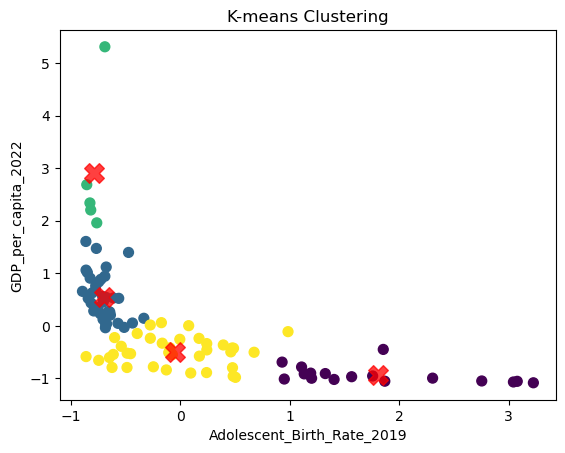

In [117]:
#Print: 
# I have some problem with 3 feature printing which I took from Rockford's code
test.DrawClusters()

In [118]:
# Grouping the cleaned frame using only one feature and then simply quantiles, you can specify how many:

test.Quantile_Division_Into_Groups('Adolescent_Birth_Rate_2019')
test.df_clusterQuantile.head()

,Adolescent_Birth_Rate_2019,GDP_per_capita_2022,WBregion_2015,Capacity_2015,GGHD_as_CHE_2019,cluster_id,cluster_nr_quantile
ARE,3.57,77203.67,5.0,0.7112,51.0,2,0
ARG,41.84,18292.318,4.0,0.8095,61.0,3,2
ARM,16.71,13837.577,3.0,1.071,12.0,3,2
AUS,8.67,52049.43,2.0,2.218,74.0,1,1
AUT,5.21,43792.855,3.0,2.479,75.0,1,0
